# Import libraries and datasets

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

sns.set_style("darkgrid")
sns.set_context('talk')

Import datasets

In [8]:
gainit = pd.read_csv('../datasets/gainit_eda.csv')
loseit = pd.read_csv('../datasets/loseit_eda.csv')

gainit_cvec = pd.read_csv('../datasets/gainit_cvec_eda.csv')
loseit_cvec = pd.read_csv('../datasets/loseit_cvec_eda.csv')

# EDA

We have about 700 posts per subreddit to analyze from, a total of 1,400.

In [10]:
gainit.shape

(721, 1)

In [5]:
loseit.shape

(720, 1)

In [57]:
gainit_cvec.shape

(721, 7709)

In [58]:
loseit_cvec.shape

(720, 9574)

We sort our bag of words for each subreddit to take a look at the words with the highest occurences.

In [12]:
gainit_cvec.sum().sort_values(ascending=False).head(20)

day         608
weight      597
ve          547
just        504
like        459
calories    367
eat         350
don         343
muscle      338
time        324
week        318
fat         314
eating      302
protein     288
really      283
gain        275
doing       274
months      272
https       271
com         269
dtype: int64

In [13]:
loseit_cvec.sum().sort_values(ascending=False).head(20)

weight      1881
ve          1022
just         997
like         870
day          852
calories     651
eating       639
time         629
week         600
don          576
know         558
really       547
eat          528
want         528
lose         525
feel         520
started      473
lost         442
loss         430
food         400
dtype: int64

Shortlist top 20 words for each subreddit and convert to dataframe

In [14]:
gainit_top = pd.DataFrame(gainit_cvec.sum().sort_values(ascending=False).head(20), columns=['counts'])
loseit_top = pd.DataFrame(loseit_cvec.sum().sort_values(ascending=False).head(20), columns=['counts'])

Plot out bargraph on the count of words

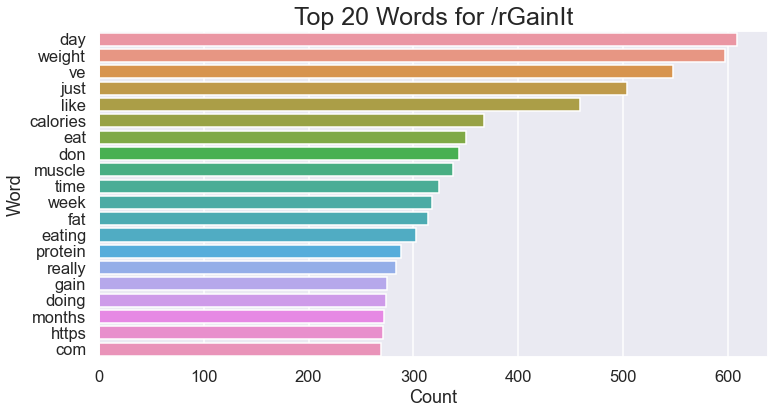

In [35]:
plt.figure(figsize=(12,6))
plt.title('Top 20 Words for /rGainIt',fontsize=25)

sns.barplot(data=gainit_top ,x=gainit_top['counts'],y=gainit_top.index,orient='h')

plt.xlabel('Count')
plt.ylabel('Word')

plt.savefig('../Images/top20gain.png', transparent=True)

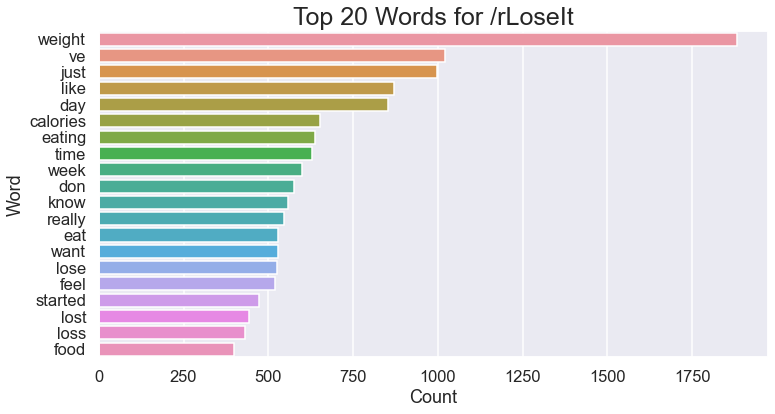

In [50]:
plt.figure(figsize=(12,6))
plt.title('Top 20 Words for /rLoseIt',fontsize=25)

sns.barplot(data=loseit_top ,x=loseit_top['counts'],y=loseit_top.index,orient='h')

plt.xlabel('Count')
plt.ylabel('Word')

plt.savefig('../Images/top20lose.png', transparent=True)

We observe a lot of similar words between the two subreddits. However, it's interesting to point out that /rGainIt has some standout words like 'muscle', 'protein' and 'fat' which does not appear in the top 20 of /rLoseIt. Below's code will sieve out words that appear on both charts.

In [18]:
gainit_unique = []
for word in list(gainit_top.index):
    if word not in list(loseit_top.index):
        gainit_unique.append(word)
        
loseit_unique = []
for word in list(loseit_top.index):
    if word not in list(gainit_top.index):
        loseit_unique.append(word)
        
df_gainit_unique = pd.DataFrame(gainit_cvec[gainit_unique].sum().sort_values(ascending=False), columns=['counts'])
df_loseit_unique = pd.DataFrame(loseit_cvec[loseit_unique].sum().sort_values(ascending=False), columns=['counts'])
        
print(f'Words distinct to r/GainIt {gainit_unique}')
print(f'Words distinct to r/LoseIt {loseit_unique}')

Words distinct to r/GainIt ['muscle', 'fat', 'protein', 'gain', 'doing', 'months', 'https', 'com']
Words distinct to r/LoseIt ['know', 'want', 'lose', 'feel', 'started', 'lost', 'loss', 'food']


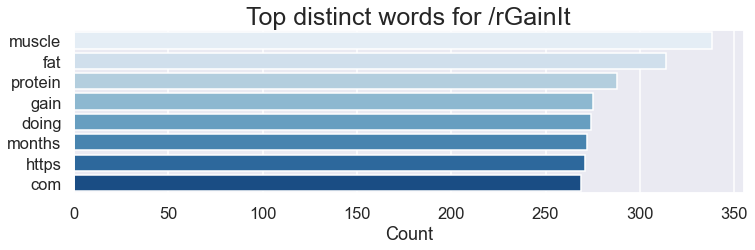

In [54]:
plt.figure(figsize=(12,3))
plt.title('Top distinct words for /rGainIt',fontsize=25)

sns.barplot(data=df_gainit_unique ,x=df_gainit_unique['counts'],y=df_gainit_unique.index,orient='h', palette='Blues')

plt.xlabel('Count')
# plt.ylabel('Word')

plt.savefig('../Images/distinctgain.png', transparent=True)

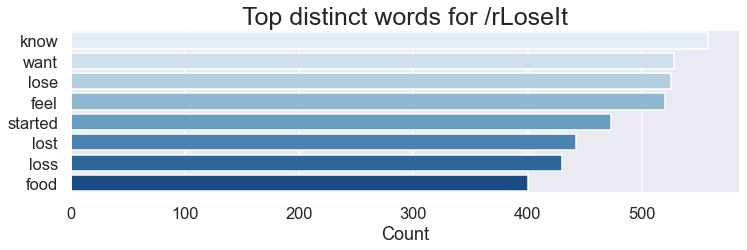

In [55]:
plt.figure(figsize=(12,3))
plt.title('Top distinct words for /rLoseIt',fontsize=25)

sns.barplot(data=df_loseit_unique ,x=df_loseit_unique['counts'],y=df_loseit_unique.index,orient='h', palette='Blues')

plt.xlabel('Count')
# plt.ylabel('Word')

plt.savefig('../Images/distinctlose.png', transparent=True)

We can observe some interesting observations from above namely:

- r/LoseIt subreddit seem to be more 'emotional' in the sense that the top words used are mostly emotional words like 'feel', 'know' and 'want'
- /rGainIt subreddit contains more subject matter words like 'muscle', 'fat', 'set', 'workout' and 'protein'
- Both subreddits contains words which we want to remove in order to have a fairer model, words like 'gain' and 'lose' are synonymous with the subreddit names

# Word Clouds

In order to better visualize the occurence of words in a different fashion, we plot out word clouds for each subreddit to better tell a better story on the strength of the words being used.

In [21]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(15, 9))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [26]:
wordcloud_gainit = ' '.join(gainit['combined'])
wordcloud_loseit = ' '.join(loseit['combined'])

## r/GainIt

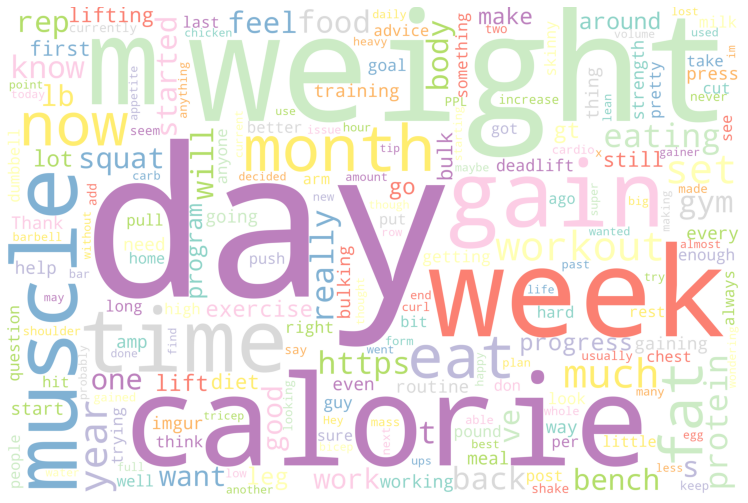

In [27]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='Set3', collocations=False, stopwords = STOPWORDS).generate(wordcloud_gainit)
plot_cloud(wordcloud)

## r/LoseIt

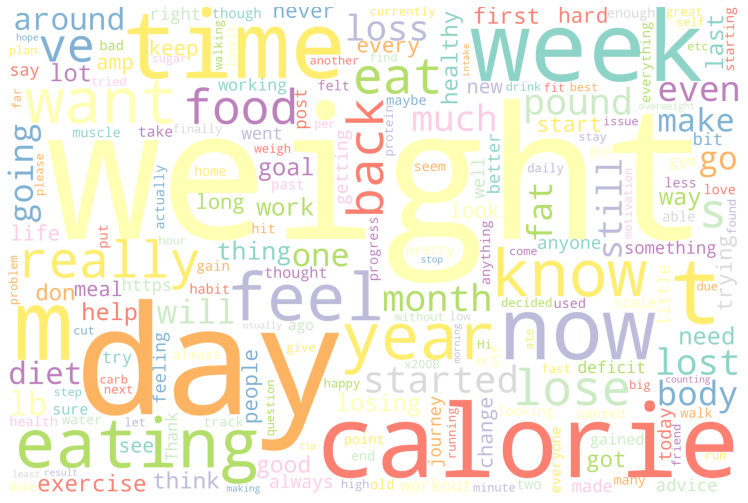

In [28]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                       colormap='Set3', collocations=False, stopwords = STOPWORDS).generate(wordcloud_loseit)
plot_cloud(wordcloud2)

Interestingly, we can see that both word clouds are very similar in the sense that both contains words that can be interchangeably used across both subreddits. We can also observe some key words in /rGainIt like 'muscle', 'squat' and 'workout' that don't appear as strongly in /rLoseIt. Our model will also show these as some of the contributing keywords that are important in our classifying exercise.